In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
data = pd.read_csv('../../data/row_data/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')>

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(data.drop('Class',axis=1))

StandardScaler()

In [29]:
scaled_features = scaler.transform(data.drop('Class',axis=1))

In [30]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [31]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Class'],
                                                    test_size=0.10)

In [37]:


np.save('X_train.npy', X_train)
y_train.to_csv('ytrain.csv', encoding='utf-8', index=False)
np.save('X_test.npy', X_test)
y_test.to_csv('ytest.csv', encoding='utf-8', index=False)


In [38]:
X_train = np.load('../../data/CreditCardFraudDetection/X_train.npy')
X_test = np.load('../../data/CreditCardFraudDetection/X_test.npy')
y_test = pd.read_csv('../../data/CreditCardFraudDetection/ytest.csv')
y_train = pd.read_csv('../../data/CreditCardFraudDetection/ytrain.csv')

In [43]:
X_train


array([[ 1.56976588,  0.02601847,  0.59047236, ...,  0.61866802,
         0.48670911, -0.34127512],
       [ 1.00880385, -0.64690594,  0.53606627, ...,  0.4747069 ,
         0.20834997,  0.04258114],
       [ 0.85632343,  1.05041243, -0.10159468, ..., -0.21182261,
        -0.17251571, -0.30521238],
       ...,
       [ 1.33505426, -0.32274112,  0.61369697, ...,  0.22211418,
         0.80701113, -0.21337634],
       [ 0.67731002,  0.97782254, -0.21261826, ..., -0.29600279,
        -0.19155201,  0.04653925],
       [-1.1041061 ,  0.61294966, -0.0467011 , ..., -0.07909782,
         0.03758185, -0.24196265]])

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.fit(X_train,y_train)

C:\Users\daivesam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [36]:
y_pred = knn.predict(X_test)

In [37]:
np.mean(y_pred != y_test)

0.0007256299521318306

C:\Users\daivesam\AppData\Local\Temp\ipykernel_25580\3069852417.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Time)


<Axes: title={'center': 'Time Distribution'}, xlabel='Time', ylabel='Density'>

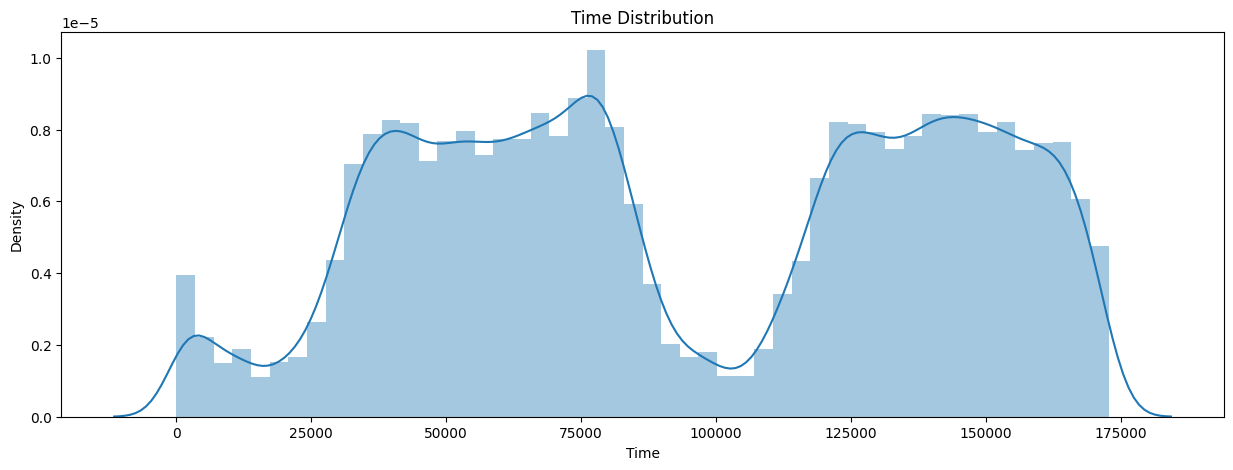

In [34]:
plt.figure(figsize=(15,5))
plt.title('Time Distribution')
sns.distplot(data.Time)

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

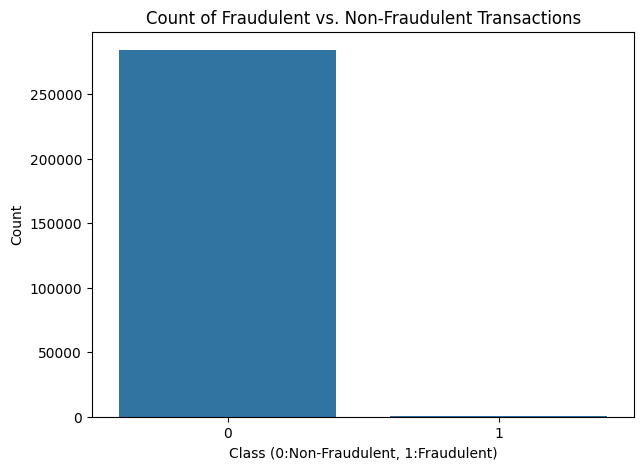

In [35]:
counts = data.Class.value_counts()
plt.figure(figsize=(7,5))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')